In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../processed_crema_d_features.csv')
df.head()

,actor_id,sentence_id,emotion_id,intensity,file_path,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,...,chroma_9,chroma_10,chroma_11,chroma_12,spec_centroid,flux,hnr,f1,f2,f3
0,1001,DFA,ANG,XX,data/crema-d/AudioWAV\1001_DFA_ANG_XX.wav,-260.785797,92.670235,8.491313,23.965403,7.477992,...,0.351906,0.429185,0.687958,0.545491,1584.993067,36.373535,-139.307532,573.760598,1843.421794,2821.197699
1,1001,DFA,DIS,XX,data/crema-d/AudioWAV\1001_DFA_DIS_XX.wav,-222.730148,95.839119,10.516283,31.619215,15.872088,...,0.353457,0.539750,0.729739,0.518431,1531.650486,29.164345,-133.817607,562.131556,1885.111607,2788.428417
2,1001,DFA,FEA,XX,data/crema-d/AudioWAV\1001_DFA_FEA_XX.wav,-285.407318,94.760910,8.155397,23.323242,11.719156,...,0.421525,0.562591,0.674666,0.353250,1489.088839,36.637135,-140.978040,552.795404,1882.987895,2805.619743
3,1001,DFA,HAP,XX,data/crema-d/AudioWAV\1001_DFA_HAP_XX.wav,-277.462189,92.528893,4.231231,27.970133,10.869824,...,0.339440,0.510474,0.717617,0.442879,1555.376034,30.603136,-137.355532,465.801159,1848.452733,2697.894901
4,1001,DFA,NEU,XX,data/crema-d/AudioWAV\1001_DFA_NEU_XX.wav,-221.977325,100.393311,9.384935,30.160904,11.466775,...,0.398137,0.615431,0.618360,0.473888,1495.394996,34.321281,-137.490385,650.859546,1830.892612,2797.225982


In [2]:
print(df.describe())
print(df['emotion_id'].value_counts())

          actor_id       mfcc_1       mfcc_2       mfcc_3       mfcc_4  \
count  7441.000000  7441.000000  7441.000000  7441.000000  7441.000000   
mean   1046.084935  -200.111183   101.386386    32.525917    22.955504   
std      26.244821    46.457808    14.334419    14.050705     7.298258   
min    1001.000000 -1131.370972     0.000000   -21.610441    -8.914308   
25%    1023.000000  -232.826630    94.002846    23.720467    18.275101   
50%    1046.000000  -199.847275   104.229446    34.776237    23.400679   
75%    1069.000000  -167.620438   111.118752    43.216705    28.034498   
max    1091.000000   -57.609650   140.046341    63.422287    46.586262   

            mfcc_5       mfcc_6       mfcc_7       mfcc_8       mfcc_9  ...  \
count  7441.000000  7441.000000  7441.000000  7441.000000  7441.000000  ...   
mean      5.603868     0.130294    -1.443191    -5.878555    -1.418412  ...   
std       8.605860     5.978394     4.312427     4.771985     3.499501  ...   
min     -32.68099

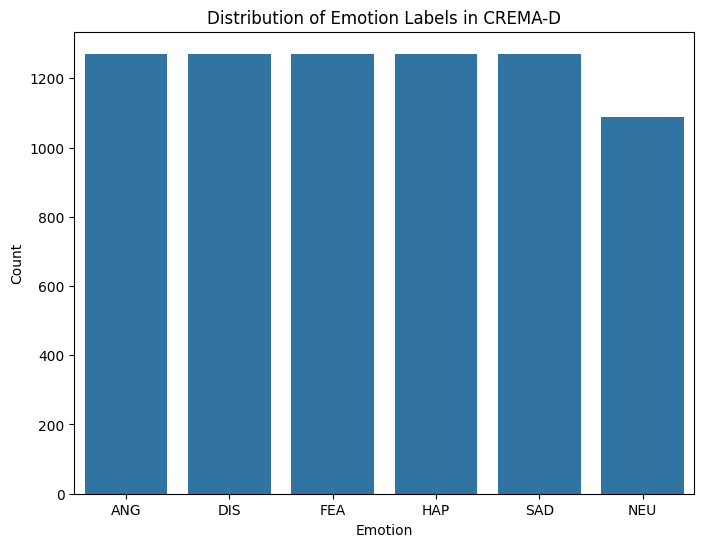

In [3]:
plt.figure(figsize=(8,6))
sns.countplot(x='emotion_id', data=df, order=df['emotion_id'].value_counts().index)
plt.title("Distribution of Emotion Labels in CREMA-D")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


KeyError: 'duration'

<Figure size 800x600 with 0 Axes>

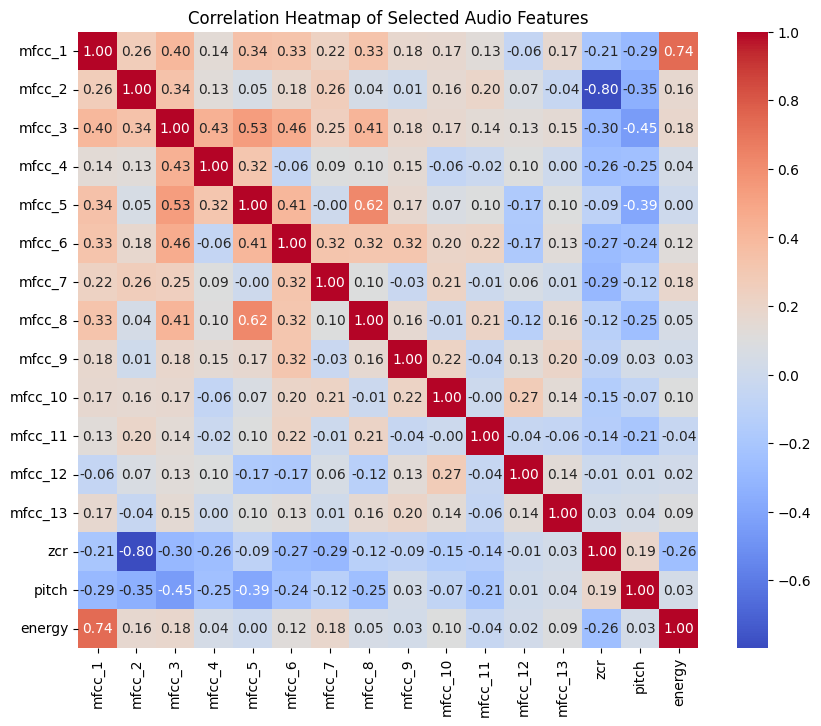

In [5]:
feature_subset = df[[f'mfcc_{i+1}' for i in range(13)] + ['zcr', 'pitch', 'energy']]
plt.figure(figsize=(10,8))
sns.heatmap(feature_subset.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Selected Audio Features")
plt.show()


In [7]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="CREMA-D Processed Data Report", explorative=True)
profile.to_file("crema_d_EDA_report.html")

c:\Users\bi25ty\Downloads\emotion_project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


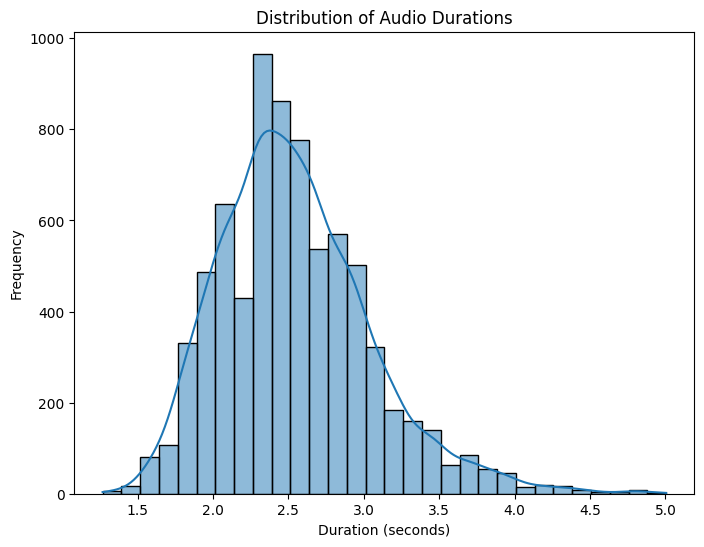

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated CSV
df = pd.read_csv('../processed_crema_d_features_with_duration.csv')

# Plot the distribution of audio durations
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'].dropna(), bins=30, kde=True)
plt.title("Distribution of Audio Durations")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.show()


In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="CREMA-D Processed Data Report", explorative=True)
profile.to_file("crema_d_EDA_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
